In [96]:
#Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.models import load_model

## Load and Pre-process the dataset

In [21]:
img_train  = pd.read_csv('./train/images.csv') 
img_val  = pd.read_csv('./valid/images.csv') 
label_train = pd.read_csv('./train/labels.csv')
label_val = pd.read_csv('./valid/labels.csv')

In [22]:
print(len(img_train))
print(len(label_train))
print(len(img_val))
print(len(label_val))

3199
3199
799
799


In [23]:
img_train.head()

,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882.1,...,0.682353.349,0.611765.91,0.650980.397,0.658824.443,0.600000.48,0.603922.77,0.654902.426,0.694118.222,0.658824.444,0.666667.441
0,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
1,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
2,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
3,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412
4,0.694118,0.682353,0.705882,0.705882,0.666667,0.694118,0.674510,0.713726,0.690196,0.709804,...,0.658824,0.698039,0.694118,0.709804,0.725490,0.694118,0.729412,0.701961,0.694118,0.709804


In [24]:
label_train.head()

,1.000000,0.000000,0.000000.1,0.000000.2
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [25]:
img_category_train = []
img_category_val = []

for index,row in label_train.iterrows():
    category = 0
    if (row[0] == 1):
        category = 0 
    elif (row[1] == 1):
        category = 1 
    elif (row[2] == 1):
        category = 2 
    else:
        category = 3
    
    img_category_train.append(category)
    
for index,row in label_val.iterrows():
    category = 0
    if (row[0] == 1):
        category = 0 
    elif (row[1] == 1):
        category = 1 
    elif (row[2] == 1):
        category = 2 
    else:
        category = 3
    
    img_category_val.append(category)
    

In [26]:
print(np.shape(img_train))
print(np.shape(label_train))
print(np.shape(img_val))
print(np.shape(label_val))

(3199, 8192)
(3199, 4)
(799, 8192)
(799, 4)


In [27]:

img_train_data = img_train.to_numpy()
img_data_val = img_val.to_numpy()
label_train_data = label_train.to_numpy()
label_val_data = label_val.to_numpy()
print(img_train_data.shape)
print(img_data_val.shape)
print(label_train_data.shape)
print(label_val_data.shape)
raw_img_data_train = img_train_data.reshape(-1,64,128)
raw_img_data_val = img_data_val.reshape(-1,64,128)

reshaped_img_data_train = np.reshape(raw_img_data_train,(-1, 64, 128, 1))
reshaped_img_data_val = np.reshape(raw_img_data_val,(-1, 64, 128,1))

print(reshaped_img_data_train.shape)
print(reshaped_img_data_val.shape)


(3199, 8192)
(799, 8192)
(3199, 4)
(799, 4)
(3199, 64, 128, 1)
(799, 64, 128, 1)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_img_data_train,label_train_data, test_size=0.2, random_state=69)

In [29]:
print(len(X_train) , len(X_test) , len(y_train) , len(y_test))

2559 640 2559 640


In [30]:
X_train.shape


(2559, 64, 128, 1)

In [31]:
spectrograms = [ "squiggle", "narrowband", "narrowbanddrd", "noise"]

In [32]:
# interpolation='nearest' simply displays an image without trying to interpolate between pixels if the display resolution is not the same as the image resolution

## Visualize the dataset

[1. 0. 0. 0.]


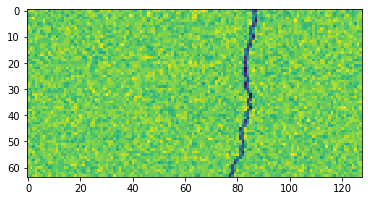

In [35]:
plt.imshow(raw_img_data_train[0], interpolation='nearest')
print(label_train_data[0])

[0. 0. 0. 1.]


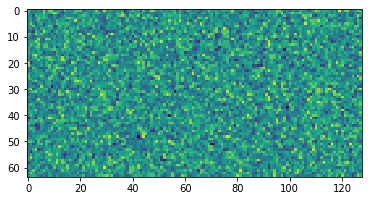

In [42]:
plt.imshow(raw_img_data_train[2179], interpolation='nearest')
print(label_train_data[2179])

[0. 0. 1. 0.]


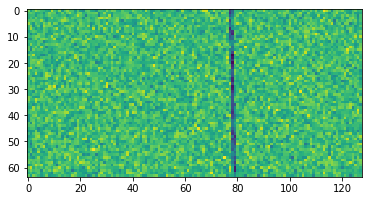

In [43]:
plt.imshow(raw_img_data_train[1012], interpolation='nearest')
print(label_train_data[1012])

[0. 1. 0. 0.]


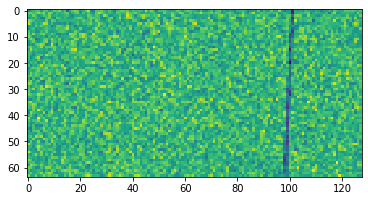

In [44]:
plt.imshow(raw_img_data_train[3100], interpolation='nearest')
print(label_train_data[3100])

[1. 0. 0. 0.]


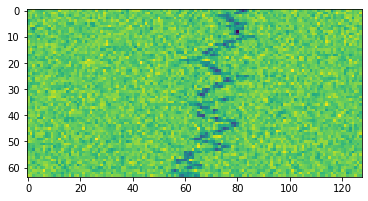

In [45]:
plt.imshow(raw_img_data_val[3], interpolation='nearest')
print(label_val_data[3])

[0. 0. 1. 0.]


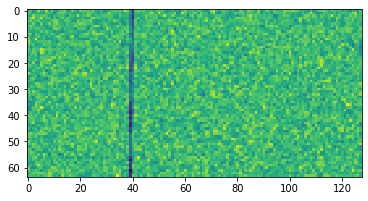

In [46]:
plt.imshow(raw_img_data_val[310], interpolation='nearest')
print(label_val_data[310])

[0. 0. 0. 1.]


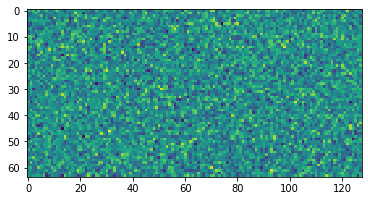

In [47]:
plt.imshow(raw_img_data_val[510], interpolation='nearest')
print(label_val_data[510])

[0. 1. 0. 0.]


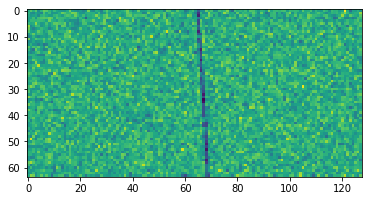

In [48]:
plt.imshow(raw_img_data_val[710], interpolation='nearest')
print(label_val_data[710])

## Model Training Process

In [49]:
### For Image Augmentation
size_batch = 32

train_datagen = ImageDataGenerator(
        rotation_range=73,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow(X_train,y_train,batch_size=size_batch)


In [50]:
test_datagen = ImageDataGenerator()

test_generator = train_datagen.flow(X_test,y_test,batch_size=size_batch)

In [51]:
callbacks = EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')
#autosave best Model
best_model_file = '/best_weights.h5'
best_model = ModelCheckpoint(best_model_file,monitor='val_loss',verbose=1,save_best_only=True)

In [52]:
#Creating CNN Model
IMG_ROWS = 64
IMG_COLS = 128
num_classes = 4

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 126, 64)       640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 61, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 28, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 14, 128)      

In [53]:
# verbose is the choice that how you want to see the output of your Nural Network while it's training
history = model.fit(train_generator,epochs=12,verbose=1,validation_data=test_generator,callbacks=[best_model])


Epoch 1/12
80/80 [==============================] - ETA: 0s - loss: 1.4602 - accuracy: 0.2478
Epoch 00001: val_loss improved from inf to 1.37719, saving model to /best_weights.h5
80/80 [==============================] - 44s 536ms/step - loss: 1.4602 - accuracy: 0.2478 - val_loss: 1.3772 - val_accuracy: 0.2453
Epoch 2/12
80/80 [==============================] - ETA: 0s - loss: 1.3801 - accuracy: 0.2747
Epoch 00002: val_loss improved from 1.37719 to 1.36463, saving model to /best_weights.h5
80/80 [==============================] - 43s 533ms/step - loss: 1.3801 - accuracy: 0.2747 - val_loss: 1.3646 - val_accuracy: 0.4563
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 1.3214 - accuracy: 0.3525
Epoch 00003: val_loss improved from 1.36463 to 1.24573, saving model to /best_weights.h5
80/80 [==============================] - 41s 518ms/step - loss: 1.3214 - accuracy: 0.3525 - val_loss: 1.2457 - val_accuracy: 0.3172
Epoch 4/12
80/80 [==============================] - ETA: 0s

In [54]:
#Creating CNN Model
IMG_ROWS = 64
IMG_COLS = 128
num_classes = 4

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model2.add(LeakyReLU(alpha=0.05))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(LeakyReLU(alpha=0.05))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))


model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 61, 128)       36992     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 29, 61, 128)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 30, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 28, 128)      

In [55]:
history2 = model2.fit(train_generator,epochs=12,verbose=1,validation_data=test_generator,callbacks=[best_model])

Epoch 1/12
80/80 [==============================] - ETA: 0s - loss: 1.4242 - accuracy: 0.2595
Epoch 00001: val_loss did not improve from 0.54220
80/80 [==============================] - 44s 535ms/step - loss: 1.4242 - accuracy: 0.2595 - val_loss: 1.3783 - val_accuracy: 0.2453
Epoch 2/12
80/80 [==============================] - ETA: 0s - loss: 1.3805 - accuracy: 0.2911
Epoch 00002: val_loss did not improve from 0.54220
80/80 [==============================] - 43s 533ms/step - loss: 1.3805 - accuracy: 0.2911 - val_loss: 1.3716 - val_accuracy: 0.5000
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 1.3689 - accuracy: 0.3087
Epoch 00003: val_loss did not improve from 0.54220
80/80 [==============================] - 42s 528ms/step - loss: 1.3689 - accuracy: 0.3087 - val_loss: 1.3891 - val_accuracy: 0.2391
Epoch 4/12
80/80 [==============================] - ETA: 0s - loss: 1.2838 - accuracy: 0.3802
Epoch 00004: val_loss did not improve from 0.54220
80/80 [=================

In [56]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model3.add(MaxPooling2D((3, 3)))
model3.add(Conv2D(64, 
                 kernel_size=(5, 5), 
                 activation='relu'))
model3.add(LeakyReLU(alpha=0.01))
model3.add(MaxPooling2D(pool_size=(3, 3)))
model3.add(Conv2D(128, 
                 kernel_size=(5, 5), 
                 activation='relu'))
model3.add(LeakyReLU(alpha=0.01))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))


model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 60, 124, 32)       832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 20, 41, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 37, 64)        51264     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16, 37, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 1, 8, 128)        

In [57]:
history3 = model3.fit(train_generator,epochs=12,verbose=1,validation_data=test_generator,callbacks=[best_model])

Epoch 1/12
80/80 [==============================] - ETA: 0s - loss: 1.3968 - accuracy: 0.2501
Epoch 00001: val_loss did not improve from 0.54220
80/80 [==============================] - 16s 201ms/step - loss: 1.3968 - accuracy: 0.2501 - val_loss: 1.3865 - val_accuracy: 0.2391
Epoch 2/12
80/80 [==============================] - ETA: 0s - loss: 1.3870 - accuracy: 0.2540
Epoch 00002: val_loss did not improve from 0.54220
80/80 [==============================] - 16s 200ms/step - loss: 1.3870 - accuracy: 0.2540 - val_loss: 1.3865 - val_accuracy: 0.2391
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 1.3865 - accuracy: 0.2528
Epoch 00003: val_loss did not improve from 0.54220
80/80 [==============================] - 16s 200ms/step - loss: 1.3865 - accuracy: 0.2528 - val_loss: 1.3866 - val_accuracy: 0.2391
Epoch 4/12
80/80 [==============================] - ETA: 0s - loss: 1.3864 - accuracy: 0.2466
Epoch 00004: val_loss did not improve from 0.54220
80/80 [=================

In [58]:
model4 = Sequential()
model4.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model4.add(LeakyReLU(alpha=0.01))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(256, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(256, (3, 3), activation='relu'))
model4.add(LeakyReLU(alpha=0.01))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(num_classes, activation='softmax'))


model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 62, 126, 128)      1280      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 31, 63, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 29, 61, 128)       147584    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 29, 61, 128)       0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 30, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 28, 256)      

In [59]:
history4 = model4.fit(train_generator,epochs=12,verbose=1,validation_data=test_generator,callbacks=[best_model])

Epoch 1/12
80/80 [==============================] - ETA: 0s - loss: 1.4347 - accuracy: 0.2618
Epoch 00001: val_loss did not improve from 0.54220
80/80 [==============================] - 90s 1s/step - loss: 1.4347 - accuracy: 0.2618 - val_loss: 1.3827 - val_accuracy: 0.2453
Epoch 2/12
80/80 [==============================] - ETA: 0s - loss: 1.3858 - accuracy: 0.2552
Epoch 00002: val_loss did not improve from 0.54220
80/80 [==============================] - 91s 1s/step - loss: 1.3858 - accuracy: 0.2552 - val_loss: 1.3871 - val_accuracy: 0.2391
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 1.3868 - accuracy: 0.2528
Epoch 00003: val_loss did not improve from 0.54220
80/80 [==============================] - 90s 1s/step - loss: 1.3868 - accuracy: 0.2528 - val_loss: 1.3870 - val_accuracy: 0.2391
Epoch 4/12
80/80 [==============================] - ETA: 0s - loss: 1.3864 - accuracy: 0.2528
Epoch 00004: val_loss did not improve from 0.54220
80/80 [==========================

In [60]:
model5 = Sequential()
model5.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(32, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(LeakyReLU(alpha=0.01))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dense(num_classes, activation='softmax'))


model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 62, 126, 16)       160       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 31, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 29, 61, 32)        4640      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 28, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 14, 64)       

In [61]:
history5 = model5.fit(train_generator,epochs=12,verbose=1,validation_data=test_generator,callbacks=[best_model])

Epoch 1/12
80/80 [==============================] - ETA: 0s - loss: 1.3920 - accuracy: 0.2716
Epoch 00001: val_loss did not improve from 0.54220
80/80 [==============================] - 10s 122ms/step - loss: 1.3920 - accuracy: 0.2716 - val_loss: 1.3716 - val_accuracy: 0.3516
Epoch 2/12
80/80 [==============================] - ETA: 0s - loss: 1.3725 - accuracy: 0.2755
Epoch 00002: val_loss did not improve from 0.54220
80/80 [==============================] - 11s 139ms/step - loss: 1.3725 - accuracy: 0.2755 - val_loss: 1.3693 - val_accuracy: 0.2453
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 1.0856 - accuracy: 0.4631
Epoch 00003: val_loss did not improve from 0.54220
80/80 [==============================] - 11s 138ms/step - loss: 1.0856 - accuracy: 0.4631 - val_loss: 0.6693 - val_accuracy: 0.6922
Epoch 4/12
80/80 [==============================] - ETA: 0s - loss: 0.7469 - accuracy: 0.6104
Epoch 00004: val_loss did not improve from 0.54220
80/80 [=================

In [62]:
model6 = Sequential()
model6.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model6.add(MaxPooling2D((2, 2)))
model6.add(Conv2D(128, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(256, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(512, (3, 3), activation='relu'))
model6.add(Flatten())
model6.add(Dense(512, activation='relu'))
model6.add(Dense(num_classes, activation='softmax'))


model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 126, 128)      1280      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 31, 63, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 61, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 30, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 28, 256)       295168    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 6, 14, 256)      

In [63]:
history6 = model6.fit(train_generator,epochs=12,verbose=1,validation_data=test_generator,callbacks=[best_model])

Epoch 1/12
80/80 [==============================] - ETA: 0s - loss: 1.9307 - accuracy: 0.2466
Epoch 00001: val_loss did not improve from 0.51773
80/80 [==============================] - 102s 1s/step - loss: 1.9307 - accuracy: 0.2466 - val_loss: 1.3853 - val_accuracy: 0.2391
Epoch 2/12
80/80 [==============================] - ETA: 0s - loss: 1.3819 - accuracy: 0.2767
Epoch 00002: val_loss did not improve from 0.51773
80/80 [==============================] - 101s 1s/step - loss: 1.3819 - accuracy: 0.2767 - val_loss: 1.3888 - val_accuracy: 0.2391
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 1.3872 - accuracy: 0.2528
Epoch 00003: val_loss did not improve from 0.51773
80/80 [==============================] - 103s 1s/step - loss: 1.3872 - accuracy: 0.2528 - val_loss: 1.3871 - val_accuracy: 0.2391
Epoch 4/12
80/80 [==============================] - ETA: 0s - loss: 1.3867 - accuracy: 0.2528
Epoch 00004: val_loss did not improve from 0.51773
80/80 [=======================

In [64]:
model7 = Sequential()
model7.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model7.add(MaxPooling2D((2, 2)))
model7.add(Conv2D(32, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Conv2D(128, (3, 3), activation='relu'))
model7.add(LeakyReLU(alpha=0.05))
model7.add(Flatten())
model7.add(Dense(64, activation='relu'))
model7.add(Dense(num_classes, activation='softmax'))


model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [65]:
history7 = model7.fit(train_generator,epochs=12,verbose=1,validation_data=test_generator,callbacks=[best_model])

Epoch 1/12
80/80 [==============================] - ETA: 0s - loss: 1.3865 - accuracy: 0.2458
Epoch 00001: val_loss did not improve from 0.51773
80/80 [==============================] - 12s 129ms/step - loss: 1.3865 - accuracy: 0.2458 - val_loss: 1.3752 - val_accuracy: 0.2453
Epoch 2/12
80/80 [==============================] - ETA: 0s - loss: 1.3736 - accuracy: 0.2868
Epoch 00002: val_loss did not improve from 0.51773
80/80 [==============================] - 14s 169ms/step - loss: 1.3736 - accuracy: 0.2868 - val_loss: 1.3734 - val_accuracy: 0.3500
Epoch 3/12
80/80 [==============================] - ETA: 0s - loss: 1.1903 - accuracy: 0.4478
Epoch 00003: val_loss did not improve from 0.51773
80/80 [==============================] - 13s 160ms/step - loss: 1.1903 - accuracy: 0.4478 - val_loss: 0.8728 - val_accuracy: 0.6906
Epoch 4/12
80/80 [==============================] - ETA: 0s - loss: 0.7685 - accuracy: 0.6147
Epoch 00004: val_loss did not improve from 0.51773
80/80 [=================

## Model Evaluation

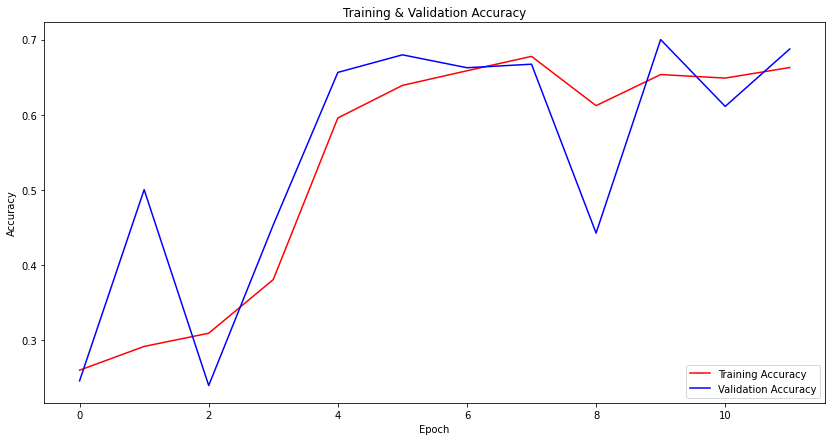

In [66]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

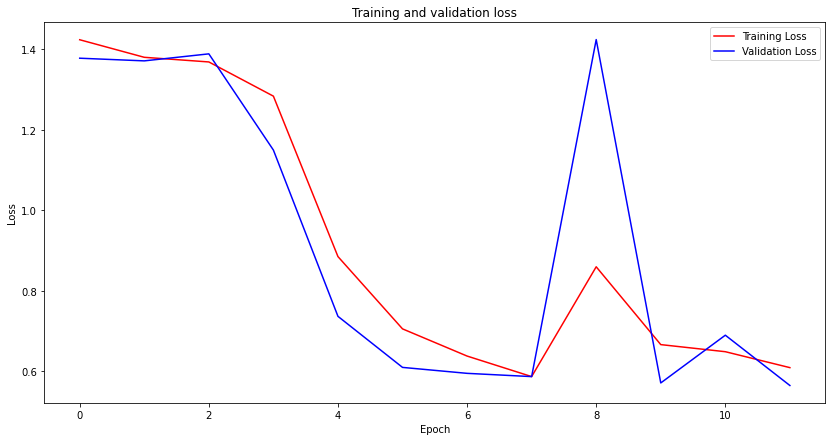

In [67]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [73]:
score2 = model2.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score2[0]) 
print('Test accuracy:', score2[1])

Test loss: 0.5560570955276489
Test accuracy: 0.7093750238418579


In [74]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.5470532178878784
Test accuracy: 0.6953125


In [77]:
score7 = model7.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score7[0]) 
print('Test accuracy:', score7[1])

Test loss: 0.727846622467041
Test accuracy: 0.6015625


In [81]:
predict_array = model2.predict(raw_img_data_val,batch_size=1,verbose=1)
answer = np.argmax(predict_array,axis=1)
print(answer)
print(len(answer))

799/799 [==============================] - 6s 8ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [82]:
print(img_category_val)
print(len(img_category_val))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [85]:
print(metrics.classification_report(img_category_val,answer,target_names=spectrograms))

               precision    recall  f1-score   support

     squiggle       0.76      0.94      0.84       199
   narrowband       0.48      0.85      0.62       200
narrowbanddrd       0.00      0.00      0.00       200
        noise       1.00      0.99      0.99       200

     accuracy                           0.70       799
    macro avg       0.56      0.70      0.61       799
 weighted avg       0.56      0.70      0.61       799



In [88]:
conf_mat = confusion_matrix(img_category_val,answer)
conf_mat

array([[187,  12,   0,   0],
       [ 29, 171,   0,   0],
       [ 30, 170,   0,   0],
       [  0,   0,   2, 198]], dtype=int64)

<AxesSubplot:>

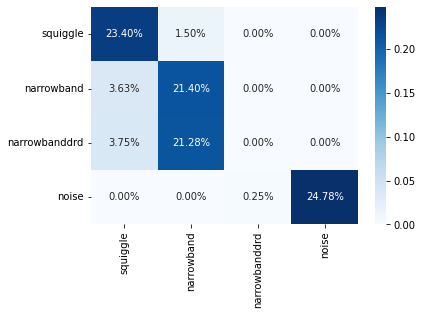

In [95]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True,fmt='.2%', cmap='Blues',
            xticklabels=spectrograms,yticklabels=spectrograms)

In [97]:
model2.save('seti_trained.h5')